# Product_Category_Prediction

### importing required libraries

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
% matplotlib.inline
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [8]:
train=pd.read_csv("/resources/data/Train1.csv")

In [9]:
test=pd.read_csv("/resources/data/Test1.csv")

In [10]:
train.head(10)

,Inv_Id,Vendor_Code,GL_Code,Inv_Amt,Item_Description,Product_Category
0,15001,VENDOR-1676,GL-6100410,83.24,Artworking/Typesetting Production Jun 2009 Cha...,CLASS-1963
1,15002,VENDOR-1883,GL-2182000,51.18,Auto Leasing Corporate Services Corning Inc /N...,CLASS-1250
2,15004,VENDOR-1999,GL-6050100,79.02,Store Management Lease/Rent Deltona Corp Real ...,CLASS-1274
3,15005,VENDOR-1771,GL-6101400,48.50,Store Construction General Requirements Coloni...,CLASS-1522
4,15006,VENDOR-1331,GL-2182000,63.35,Jul 2015 Aydin Corp Contingent Labor/Temp Labo...,CLASS-1376
5,15007,VENDOR-2076,GL-6101400,32.28,Final Site Clean Up 2018Mar Store Construction...,CLASS-1522
6,15009,VENDOR-1802,GL-6050310,5.38,Travel and Entertainment Miscellaneous Company...,CLASS-1758
7,15010,VENDOR-1191,GL-6101400,31.21,General Contractor General Requirements Final ...,CLASS-1522
8,15011,VENDOR-2120,GL-6100410,42.89,Aquila Distributors Inc ...,CLASS-1963
9,15012,VENDOR-1704,GL-6050100,59.50,Base Rent Store Management Chicago Rivet & Mac...,CLASS-1274


In [11]:
test.tail()

,Inv_Id,Vendor_Code,GL_Code,Inv_Amt,Item_Description
2441,22995,VENDOR-2237,GL-6101400,7.75,General Contractor General Requirements Final ...
2442,23002,VENDOR-1066,GL-6050310,37.35,Ground Transportation Miscellaneous Company Ca...
2443,23006,VENDOR-1883,GL-2182000,42.16,Auto Leasing Corporate Services Corning Inc /N...
2444,23009,VENDOR-2120,GL-6100410,63.52,Artworking/Typesetting Production 2007Mar Aqui...
2445,23011,VENDOR-2047,GL-2182000,40.16,2008Jul Dr Pepper Co Public Relations Agency A...


In [12]:
print("train dataset shape is", train.shape)
print("test dataset shape is", test.shape)

train dataset shape is (5566, 6)
test dataset shape is (2446, 5)


In [13]:
train.columns

Index(['Inv_Id', 'Vendor_Code', 'GL_Code', 'Inv_Amt', 'Item_Description',
       'Product_Category'],
      dtype='object')

In [14]:
test.columns

Index(['Inv_Id', 'Vendor_Code', 'GL_Code', 'Inv_Amt', 'Item_Description'], dtype='object')

### here we can see that we have 5 dependent variables and 1 independent/target variable i.e. product category

In [15]:
train.describe(include='all')

,Inv_Id,Vendor_Code,GL_Code,Inv_Amt,Item_Description,Product_Category
count,5566.000000,5566,5566,5566.000000,5566,5566
unique,NaN,1253,9,NaN,5558,36
top,NaN,VENDOR-1883,GL-6050310,NaN,Ground Transportation Travel and Entertainment...,CLASS-1758
freq,NaN,330,1618,NaN,2,1498
mean,19010.787100,NaN,NaN,49.980151,NaN,NaN
std,2306.607485,NaN,NaN,28.903030,NaN,NaN
min,15001.000000,NaN,NaN,0.010000,NaN,NaN
25%,17006.250000,NaN,NaN,24.957500,NaN,NaN
50%,19017.500000,NaN,NaN,49.645000,NaN,NaN
75%,20994.750000,NaN,NaN,75.170000,NaN,NaN


In [16]:
train.isnull().sum()

Inv_Id              0
Vendor_Code         0
GL_Code             0
Inv_Amt             0
Item_Description    0
Product_Category    0
dtype: int64

In [17]:
test.isnull().sum()

Inv_Id              0
Vendor_Code         0
GL_Code             0
Inv_Amt             0
Item_Description    0
dtype: int64

### we have no null value so there is no need of data cleaning

### for some time we can remove itrem category, strings present in item code & gl code so that we will left with numeric data only for modelling and prediction purpose.

In [18]:
train_new=train.drop(['Item_Description'], axis=1)
train_new

,Inv_Id,Vendor_Code,GL_Code,Inv_Amt,Product_Category
0,15001,VENDOR-1676,GL-6100410,83.24,CLASS-1963
1,15002,VENDOR-1883,GL-2182000,51.18,CLASS-1250
2,15004,VENDOR-1999,GL-6050100,79.02,CLASS-1274
3,15005,VENDOR-1771,GL-6101400,48.50,CLASS-1522
4,15006,VENDOR-1331,GL-2182000,63.35,CLASS-1376
5,15007,VENDOR-2076,GL-6101400,32.28,CLASS-1522
6,15009,VENDOR-1802,GL-6050310,5.38,CLASS-1758
7,15010,VENDOR-1191,GL-6101400,31.21,CLASS-1522
8,15011,VENDOR-2120,GL-6100410,42.89,CLASS-1963
9,15012,VENDOR-1704,GL-6050100,59.50,CLASS-1274


In [19]:
train_new['Vendor_Code'] = train_new['Vendor_Code'] .map(lambda x: x.lstrip('VENDOR-'))
train_new.head()

,Inv_Id,Vendor_Code,GL_Code,Inv_Amt,Product_Category
0,15001,1676,GL-6100410,83.24,CLASS-1963
1,15002,1883,GL-2182000,51.18,CLASS-1250
2,15004,1999,GL-6050100,79.02,CLASS-1274
3,15005,1771,GL-6101400,48.50,CLASS-1522
4,15006,1331,GL-2182000,63.35,CLASS-1376


In [20]:
train_new['GL_Code'] = train_new['GL_Code'] .map(lambda x: x.lstrip('GL-'))
train_new.head()

,Inv_Id,Vendor_Code,GL_Code,Inv_Amt,Product_Category
0,15001,1676,6100410,83.24,CLASS-1963
1,15002,1883,2182000,51.18,CLASS-1250
2,15004,1999,6050100,79.02,CLASS-1274
3,15005,1771,6101400,48.50,CLASS-1522
4,15006,1331,2182000,63.35,CLASS-1376


In [21]:
train_new['Product_Category'] = train_new['Product_Category'] .map(lambda x: x.lstrip('CLASS-'))
train_new.head()

,Inv_Id,Vendor_Code,GL_Code,Inv_Amt,Product_Category
0,15001,1676,6100410,83.24,1963
1,15002,1883,2182000,51.18,1250
2,15004,1999,6050100,79.02,1274
3,15005,1771,6101400,48.50,1522
4,15006,1331,2182000,63.35,1376


### Now we have all numeric data and we can do modelling and prddiction

### lets make heatmap matrix plot to know correlation b/w different variables

In [22]:
matrix=train_new.corr()

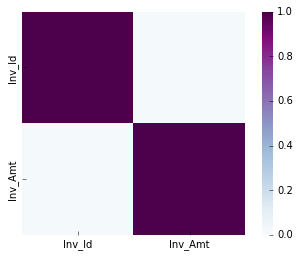

In [23]:
relation=plt.subplots(figsize=(9,8))
%matplotlib inline
sns.heatmap(matrix, square=True, cmap="BuPu", vmin=0.0, vmax= 1.0)

### No wrong or missing values till now in our dataset so moving further towrds building a model

### lets do modelling

In [24]:
features=['Inv_Id', 'Vendor_Code', 'GL_Code', 'Inv_Amt']

In [25]:
x=train_new[features] # independent variables
x.head()

,Inv_Id,Vendor_Code,GL_Code,Inv_Amt
0,15001,1676,6100410,83.24
1,15002,1883,2182000,51.18
2,15004,1999,6050100,79.02
3,15005,1771,6101400,48.50
4,15006,1331,2182000,63.35


In [26]:
y=train_new['Product_Category'] #dependent/target variable
y.head()

0    1963
1    1250
2    1274
3    1522
4    1376
Name: Product_Category, dtype: object

# Modelling with Random forest regressor

In [27]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

In [122]:
model=RandomForestRegressor(max_depth=30, random_state = 0)

In [123]:
x_train_new, x_test, y_train_new, y_test = train_test_split(x, y, random_state=42, test_size=0.3)

In [124]:
model.fit(x_train_new,y_train_new)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=30,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=0, verbose=0, warm_start=False)

### Model parameters study

In [125]:
from sklearn.metrics import mean_squared_error, r2_score

In [126]:
model_score = model.score(x_train_new,y_train_new)
model_score 

0.9524015726332743

In [127]:
print( 'coefficient of determination R^2 of the prediction.: ',model_score)
y_pred = model.predict(x_test)

coefficient of determination R^2 of the prediction.:  0.9524015726332743


### Best cofficient of r square is 1. and we have 95% which is pretty good.
### Model score is also 95% which is good enough to procedd in further processing

In [128]:
# The mean squared error
print("Mean squared error: %.2f"% mean_squared_error(y_test, y_pred))

Mean squared error: 19984.14


### This MSE is higher due to presence of outliers in data

In [129]:
# Explained variance score: 1 is perfect prediction
print('Test Variance score: %.2f' % r2_score(y_test, y_pred))

Test Variance score: 0.70


### Best variance of score is 1. and we have 70% 

### Accuracy report with test data :

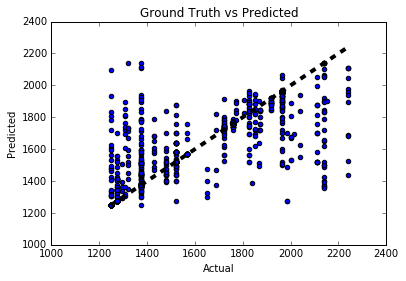

In [130]:
# So let's run the model against the test data
from sklearn.model_selection import cross_val_predict

fig, ax = plt.subplots()
ax.scatter(y_test, y_pred, edgecolors=(0, 0, 0))
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
ax.set_title("Ground Truth vs Predicted")
plt.show()

### This approach is fitted in model pretty good but there are some outliers which leads to high MSE.

### Experimenting with variable item_description as independent variable

In [131]:
df=pd.read_csv("/resources/data/Train1.csv")

In [132]:
df2=pd.read_csv("/resources/data/Test1.csv")

In [133]:
df.head()

,Inv_Id,Vendor_Code,GL_Code,Inv_Amt,Item_Description,Product_Category
0,15001,VENDOR-1676,GL-6100410,83.24,Artworking/Typesetting Production Jun 2009 Cha...,CLASS-1963
1,15002,VENDOR-1883,GL-2182000,51.18,Auto Leasing Corporate Services Corning Inc /N...,CLASS-1250
2,15004,VENDOR-1999,GL-6050100,79.02,Store Management Lease/Rent Deltona Corp Real ...,CLASS-1274
3,15005,VENDOR-1771,GL-6101400,48.50,Store Construction General Requirements Coloni...,CLASS-1522
4,15006,VENDOR-1331,GL-2182000,63.35,Jul 2015 Aydin Corp Contingent Labor/Temp Labo...,CLASS-1376


In [134]:
df.shape

(5566, 6)

In [135]:
df2.shape

(2446, 5)

### Extracting Features from data
### To analyze a preprocessed data, it needs to be converted into features. Depending upon the usage, text features can be constructed using assorted techniques – Bag-of-Words, TF-IDF, and Word Embeddings. In this, we will be covering only Bag-of-Words and TF-IDF.

### bag of words 

In [136]:
from sklearn.feature_extraction.text import CountVectorizer
bow_vectorizer = CountVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')
# bag-of-words feature matrix
bow = bow_vectorizer.fit_transform(df['Item_Description'])
bow

<5566x1000 sparse matrix of type '<class 'numpy.int64'>'
	with 61958 stored elements in Compressed Sparse Row format>

In [137]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')
# TF-IDF feature matrix
tfidf = tfidf_vectorizer.fit_transform(df['Item_Description'])
tfidf

<5566x1000 sparse matrix of type '<class 'numpy.float64'>'
	with 61958 stored elements in Compressed Sparse Row format>

## Natural Language Processing: Feature Engineering using BoW and TFIDF approaches.
### Natural Language Processing (NLP) is a sub-field of artificial intelligence that deals understanding and processing human language.

###  Model Building(Random Forest Regressor)
### 1.) Building model using Bag-of-Words features

In [138]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

In [139]:
df_bow = bow[:5566,:]
df2_bow = bow[2446:,:]

# splitting data into training and validation set
xdf_bow, xvalid_bow, ydf, yvalid = train_test_split(df_bow, y, random_state=42, test_size=0.3)

In [140]:
model1=RandomForestRegressor()
model1.fit(xdf_bow, ydf) # training the model

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [141]:
y_pred=model1.predict(xvalid_bow)
y_pred

array([1758., 1758., 1758., ..., 1274., 2141., 1250.])

In [142]:
model1_score = model1.score(xdf_bow,ydf)
model_score 

0.9524015726332743

In [143]:
print( 'coefficient of determination R^2 of the prediction.: ',model1_score)

coefficient of determination R^2 of the prediction.:  0.999786957839893


### Best cofficient of r square is 1. and we have 99% which is very good

In [144]:
# The mean squared error
print("Mean squared error: %.2f"% mean_squared_error(yvalid, y_pred))

Mean squared error: 330.32


### MSE is little high because of prersence of outliers

### submission

In [152]:
df2.head()

,Inv_Id,Vendor_Code,GL_Code,Inv_Amt,Item_Description
0,15003,VENDOR-2513,GL-6050310,56.13,Travel and Entertainment Miscellaneous Company...
1,15008,VENDOR-1044,GL-6101400,96.56,Final Site Clean Up Store Construction Advance...
2,15013,VENDOR-1254,GL-6101400,55.93,Arabian American Development Co Final Site Cle...
3,15019,VENDOR-1331,GL-2182000,32.62,Corporate Services Contingent Labor/Temp Labor...
4,15020,VENDOR-2513,GL-6050310,25.81,Fortune National Corp Miscellaneous Company Ca...


In [153]:
p=df2.iloc[:,0]
p.head()

0    15003
1    15008
2    15013
3    15019
4    15020
Name: Inv_Id, dtype: int64

In [154]:
p=pd.DataFrame(data=p)
p.head()

,Inv_Id
0,15003
1,15008
2,15013
3,15019
4,15020


In [155]:
y_pred

array([1758., 1758., 1758., ..., 1274., 2141., 1250.])

In [156]:
 y_pred_final = pd.DataFrame(y_pred)      
y_pred_final.head()

,0
0,1758.0
1,1758.0
2,1758.0
3,1721.0
4,1250.0


In [157]:
y_pred_final.columns = ['Product_Category']
y_pred_final.columns

Index(['Product_Category'], dtype='object')

In [158]:
y_pred_final.head()

,Product_Category
0,1758.0
1,1758.0
2,1758.0
3,1721.0
4,1250.0


In [159]:
y_pred_final['Product_Category'] = 'CLASS-' + y_pred_final['Product_Category'].astype(str)
y_pred_final.head()

,Product_Category
0,CLASS-1758.0
1,CLASS-1758.0
2,CLASS-1758.0
3,CLASS-1721.0
4,CLASS-1250.0


In [160]:
z=pd.concat([p, y_pred_final], axis=1)
z.head()

,Inv_Id,Product_Category
0,15003,CLASS-1758.0
1,15008,CLASS-1758.0
2,15013,CLASS-1758.0
3,15019,CLASS-1721.0
4,15020,CLASS-1250.0


### renaming column name

In [161]:
z.columns = ['Inv_Id', 'Product_Category']
z.columns

Index(['Inv_Id', 'Product_Category'], dtype='object')

In [162]:
z.head()

,Inv_Id,Product_Category
0,15003,CLASS-1758.0
1,15008,CLASS-1758.0
2,15013,CLASS-1758.0
3,15019,CLASS-1721.0
4,15020,CLASS-1250.0


In [163]:
submission = z[['Inv_Id', 'Product_Category']]
submission.to_csv('sub_bow.csv', index=False) # writing data to a CSV file

In [164]:
new_bow=pd.read_csv("sub_bow.csv")

In [165]:
new_bow.head()

,Inv_Id,Product_Category
0,15003,CLASS-1758.0
1,15008,CLASS-1758.0
2,15013,CLASS-1758.0
3,15019,CLASS-1721.0
4,15020,CLASS-1250.0


In [167]:
print("Final Dataset for submission shape:", new_bow.shape)

Final Dataset for submission shape: (2446, 2)


In [169]:
new_bow.isnull().sum()

Inv_Id                0
Product_Category    776
dtype: int64

### Download link for csv file created for submission

In [170]:
from IPython.display import HTML
import base64

def create_download_link( submission, title = "Download CSV file", filename = "sub_bow.csv"):  
    csv = submission.to_csv()
    b64 = base64.b64encode(csv.encode())
    payload = b64.decode()
    html = '<a download="{filename}" href="data:text/csv;base64,{payload}" target="_blank">{title}</a>'
    html = html.format(payload=payload,title=title,filename=filename)
    return HTML(html)

create_download_link(submission)

# SUMMARY
### We have adopted ,mainly three approaches here for prediction of product category i.e. Decision Tree Regressor, Random Foresr Regressor,Feature Engineering(NLP).
### In both Regressors, accuracy came out almost same but for best results if we observe all factors in deep we can say that Random Forest Regressor is beeter than Decision Tree Regressor.
### Then Using Random Forest Regressor, we have done feature engineering with two approaches i.e. bag of words & tfidf approaches.
### These two approaches results almost equal accuracy score, but likewise in depth we conclude that Bag of Words is best approach using Random Forest Regressor.